In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data

iris_data = pd.DataFrame(X, columns = iris.feature_names)
print("The shape of the dataset is: ", iris_data.shape)
iris_data.head()

The shape of the dataset is:  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 60) # We use k-means++ to avoid the random initialization trap
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  # kmeans.inertia_ returns the WCSS value for an initialized cluster


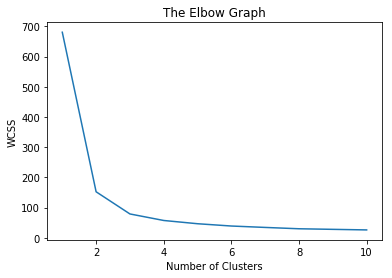

In [4]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 60)
y = kmeans.fit_predict(X)

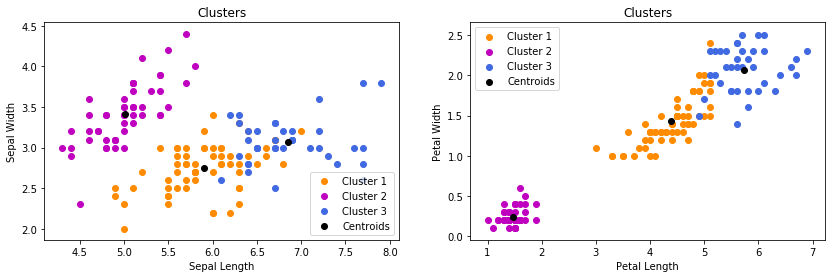

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Sepal Length vs. Sepal Width
ax1.scatter(X[y == 0, 0], X[y == 0, 1], c = 'darkorange', label = 'Cluster 1' )
ax1.scatter(X[y == 1, 0], X[y == 1, 1], c = 'm', label = 'Cluster 2' )
ax1.scatter(X[y == 2, 0], X[y == 2, 1], c = 'royalblue', label = 'Cluster 3' )

centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', label = 'Centroids')

ax1.title.set_text('Clusters')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.legend()

# Petal Length vs. Petal Width
ax2.scatter(X[y == 0, 2], X[y == 0, 3], c = 'darkorange', label = 'Cluster 1' )
ax2.scatter(X[y == 1, 2], X[y == 1, 3], c = 'm', label = 'Cluster 2' )
ax2.scatter(X[y == 2, 2], X[y == 2, 3], c = 'royalblue', label = 'Cluster 3' )

centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 2], centers[:, 3], c='black', label = 'Centroids')

ax2.title.set_text('Clusters')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.legend()

plt.show()